In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./drown.csv")
print(df.head())
print(df.info())

   heartrate  systolicbp  diastolicbp  spo2  status
0         90          92           75    90       1
1        108          87           57    93       2
2         92          88           71    93       2
3        101          75           74    93       1
4         98         103           70    88       2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10728 entries, 0 to 10727
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   heartrate    10728 non-null  int64
 1   systolicbp   10728 non-null  int64
 2   diastolicbp  10728 non-null  int64
 3   spo2         10728 non-null  int64
 4   status       10728 non-null  int64
dtypes: int64(5)
memory usage: 419.2 KB
None


In [3]:
X = np.array(df[['heartrate', 'systolicbp', 'diastolicbp', 'spo2']])
y = np.array(df['status'])
print(X.shape, y.shape)

(10728, 4) (10728,)


In [4]:
print(np.count_nonzero(y == 0), np.count_nonzero(y == 1), np.count_nonzero(y == 2), np.count_nonzero(y == 3), np.count_nonzero(y == 4))

1052 4490 2799 1460 927


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8582, 4) (8582,) (2146, 4) (2146,)


In [6]:
from sklearn import svm
model = svm.SVC(kernel = 'rbf',
                gamma = 0.1,
                C = 10,
                random_state = 0,
                verbose = 1
               )
model.fit(X_train, y_train)

[LibSVM]

SVC(C=10, gamma=0.1, random_state=0, verbose=1)

In [7]:
y_pred = model.predict(X_test)

0.9711090400745573


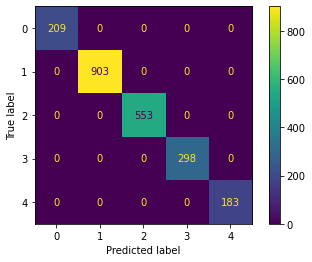

In [8]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, confusion_matrix
plot_confusion_matrix(model, X_test, y_pred)
confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(acc)

In [9]:
confusion_matrix(y_test, y_pred)

array([[209,   0,   0,   0,   0],
       [  0, 884,  18,   0,   0],
       [  0,  18, 530,   9,   0],
       [  0,   0,   5, 281,   3],
       [  0,   1,   0,   8, 180]], dtype=int64)

In [10]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       0.98      0.98      0.98       902
           2       0.96      0.95      0.95       557
           3       0.94      0.97      0.96       289
           4       0.98      0.95      0.97       189

    accuracy                           0.97      2146
   macro avg       0.97      0.97      0.97      2146
weighted avg       0.97      0.97      0.97      2146



In [11]:
s_x = [[95, 96, 70, 90]]
model.predict(s_x)

array([3], dtype=int64)

In [15]:
import pickle
filename = 'final_model.pkl'
# pickle.dump(model, open(filename, 'wb'))

In [16]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(s_x)
print(result)

[3]
